#***Tratando Valores ausentes com Python e Pandas***

Ao **analisar dados** no mundo real é comum se deparar com **dados ausentes** em seu dataset, e muito mais importante que **indentificar esses dados** é saber como tratá-los.

Esse tipo de informação costuma ser uma praga em **data science**,principalmente quando estamos trabalhando com [scikit-learn](https://scikit-learn.org/stable/), pois seus estimadores tem dificuldade de processar esses valores.


Em muitos casos podemos **excluir ou substituir** esses valores dependendo do seu formato(numericos ou categoritos), mas o importante é sempre enteder o problema que estamos querendo resolver e assim ter um melhor direcionamento de como **tratar nosso dados**. 

### ***Dados***   

Neste artigo vamos trabalhar com dois conjuntos de dados para demostrar nossos casos.


- [NYC Motor Vehicle Collisions Prediction](https://www.kaggle.com/kukuroo3/nyc-motor-vehicle-collisions-to-person)
- [Titanic](https://www.kaggle.com/c/titanic/data)




Carregando os dados, vou importar diretamente do meu [github](https://https://github.com/Gabrielmarcial/Data-Marte), mas caso queria os dados pode baixar diretamente no link acima ou usar os links com o caminho do meu github.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()

In [ ]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/Gabrielmarcial/Data-Marte/main/datasets/train.csv')
df_vehicle = pd.read_csv('https://raw.githubusercontent.com/Gabrielmarcial/Data-Marte/main/datasets/NYC_Motor_Vehicle_Collisions_to_Person.csv')

In [ ]:
df_titanic.shape

(891, 12)

In [ ]:
df_vehicle.shape

(45669, 21)

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_vehicle.head()

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,...,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,...,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918


### ***Identificando Valores Ausentes***

Os valores ausentes na maioria das vezes indentificamos como  `NaN`, podendo ser substituido por outros valores ou strings, mas o primeiro passo é saber como indentificalos. 

Podemos indentificalos de duas maneiras, com operação `booleana (True e False) `ou `quantitativo`. 

Com o comando `datafreme.isnull()` mostra de forma booleana os valores ausentes no dataframe.

In [ ]:
df_titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Com retorno valores booleanos não é muito útli para analisar e tratar esses dados, com isso usamos junto com ele o `.sum()` .

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Nesse comando ele pega a quantidade de valores em cada coluna e retorna a quantidade de `True`, assim conseguimos ter uma noção dos valores ausentes por coluna. 

Com o dataset do Titanic já verificamos que as colunas `'Age','Cabin','Embarked`' estão com respectivamente 177,687 e 2 **valores ausentes**. 

Agora com o dataset de veiculos.

In [ ]:
df_vehicle.isnull().sum()

CRASH_DATE                   0
CRASH_TIME                   0
PERSON_INJURY                0
PERSON_AGE                 421
BODILY_INJURY                0
SAFETY_EQUIPMENT          6235
PERSON_SEX                   0
PERSON_TYPE                  0
PED_LOCATION             39098
CONTRIBUTING_FACTOR_2    39123
EJECTION                  6240
COMPLAINT                    0
EMOTIONAL_STATUS             0
VEHICLE_ID                6571
PERSON_ID                    0
CONTRIBUTING_FACTOR_1    39111
POSITION_IN_VEHICLE       6221
PED_ROLE                     0
UNIQUE_ID                    0
PED_ACTION               39098
COLLISION_ID                 0
dtype: int64

Outra forma de **visualizar esses dados** é de **forma gráfica**, vamos usar seaborn e um gráfico de barras para representar esses dados.

Aqui vou construir uma função para gerer esse gráfico separando as coolunas com valores ausentes e seus respectivos nomes.

In [ ]:
def missing_visualization(df):
  quant_isnull = df.isnull().sum()
  columns = df.columns
  
  dic = {'colunas':[],'quant_isnull':[]}
  for coluna,quant in zip(columns,quant_isnull):
    if quant > 0:
      dic['colunas'].append(quant)
      dic['quant_isnull'].append(coluna)

  df = pd.DataFrame(dic)

  plt.figure(figsize=(15,5))
  sns.barplot(x=df['quant_isnull'],y=df['colunas'],data=df)
  plt.xticks(rotation=45);


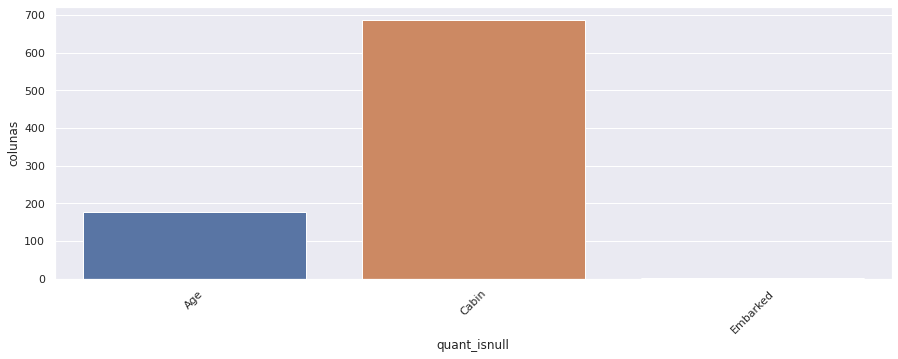

In [ ]:
missing_visualization(df_titanic)

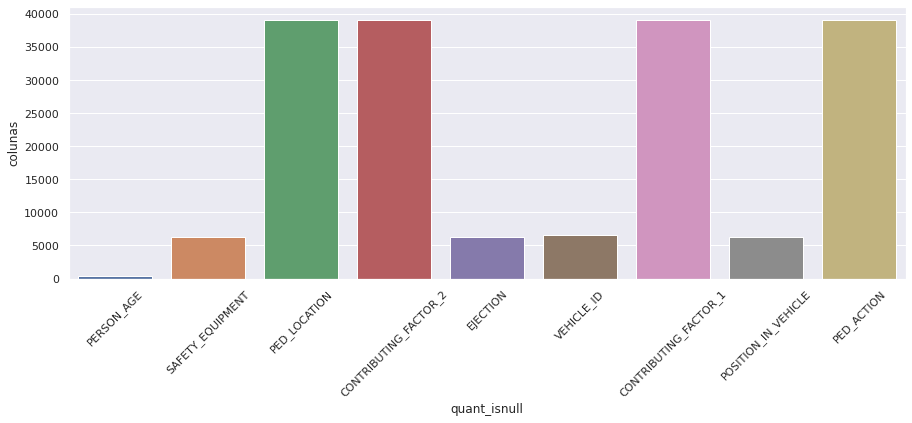

In [ ]:
missing_visualization(df_vehicle)

## ***Tratando Valores Ausentes***

### ***Descartando Valores ausenstes*** 

- **Coluna com grande quantidade de dados Faltantes** : Nesse caso como a quantidade é muito grande de **85% a 90%** (quantidade que costumo usar) o ideal é excluir pois a quantidade de valores é muito grande em relação a quantidade de dados.

- **Linha com grande quantidade de dados Faltantes:** Nessa caso acima de 50% seria interessante retirar aquela linha. 

Lembrando que cada caso deve ser analisado com cuidado, pois estamos excluindo valores, como em caso de  base de clientes ou alunos não seria interessante sumir com eles, então sempre analise seu problema. 


Primeiro vamos aprender como identificar as **colunas** com uma grande quantidade de **valores ausentes**.

In [ ]:
limite = df_vehicle.shape[0]*0.85

drop_columns = []

quant_isnull = df_vehicle.isnull().sum()
columns = df_vehicle.columns
for q,c in zip(quant_isnull,columns):
  if q >= limite :
    drop_columns.append(c)

drop_columns

['PED_LOCATION',
 'CONTRIBUTING_FACTOR_2',
 'CONTRIBUTING_FACTOR_1',
 'PED_ACTION']

Então eu criei um valor limite para identificarmos os valores faltantes acima dele e salvei os nomes na variavel drop_columns.

Para **Excluir colunas** vamos usar o comando :

```
df.drop(columns=['nome_da_coluna'],inplace=True)
```

In [ ]:
df_vehicle.drop(columns=drop_columns,inplace=True)

In [ ]:
df_vehicle.shape

(45669, 17)

verificando o shape conseguimos identificar que as colunas foram excluidas, pois passou de 22 para 17 colunas.


e para as **linhas** com Valores faltantes vamos usar o comando abaixo, 
o parâmetro `thresh` serve para definir a quantidade de valores limite que uma linha pode ter de valores faltantes. 


```
df.dropna(thresh=None,axis=0,inplace=True)
```

Nas duas bases de dados não temos nenhuma linha com uma quantidade de 50% ou mais valores ausentes, então vou usar um exemplo da propria documentação do pandas para demostrar.

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
limite = df.shape[1]*0.5

df.dropna(thresh=limite,inplace=True)

In [ ]:
df

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


### ***Substituindo Valores ausenstes*** 
- **Valores Númericos** : Com valores númericos podemos substituir por **zeros**,**média** ou pela **mediana** dos valores;
- **Valores Categóricos** : Com valores Categóricos podemos substituir pelo valor com maior **ocorrência(Frequência)** na coluna.


Para susbstituir valores ausentes usamos o comando: 


```
df['nome_coluna'] = df['nome_coluna'].fillna(media)
```


Nessa parte vamos tratar um do tipo de coluna de cada dataframe.  

In [ ]:
df_vehicle.isnull().sum()

CRASH_DATE                0
CRASH_TIME                0
PERSON_INJURY             0
PERSON_AGE              421
BODILY_INJURY             0
SAFETY_EQUIPMENT       6235
PERSON_SEX                0
PERSON_TYPE               0
EJECTION               6240
COMPLAINT                 0
EMOTIONAL_STATUS          0
VEHICLE_ID             6571
PERSON_ID                 0
POSITION_IN_VEHICLE    6221
PED_ROLE                  0
UNIQUE_ID                 0
COLLISION_ID              0
dtype: int64

In [ ]:
df_vehicle.dtypes

CRASH_DATE              object
CRASH_TIME              object
PERSON_INJURY           object
PERSON_AGE             float64
BODILY_INJURY           object
SAFETY_EQUIPMENT        object
PERSON_SEX              object
PERSON_TYPE             object
EJECTION                object
COMPLAINT               object
EMOTIONAL_STATUS        object
VEHICLE_ID             float64
PERSON_ID               object
POSITION_IN_VEHICLE     object
PED_ROLE                object
UNIQUE_ID                int64
COLLISION_ID             int64
dtype: object

vamos pegar `PERSON_AGE e SAFETY_EQUIPMENT` do df_vehicle que são respectivamente do tipo `float64 e object`

Com o PERSON_AGE vamos substitir os valores ausentes pela **média dos valores** daquela **coluna**.

In [ ]:
media = df_vehicle['PERSON_AGE'].mean()
media 

37.48764586280057

In [ ]:
df_vehicle['PERSON_AGE'] = df_vehicle['PERSON_AGE'].fillna(media)

NO caso do SAFETY_EQUIPMENT vamos pegar o valores de maior frequência.

In [ ]:
df_vehicle['SAFETY_EQUIPMENT'].value_counts()

Lap Belt & Harness                          18184
Unknown                                      6818
None                                         5942
Lap Belt                                     3711
Helmet (Motorcycle Only)                     1205
Helmet Only (In-Line Skater/Bicyclist)       1047
Air Bag Deployed/Lap Belt/Harness             926
Child Restraint Only                          490
Helmet/Other (In-Line Skater/Bicyclist)       326
Air Bag Deployed                              261
Other                                         233
Air Bag Deployed/Lap Belt                     145
Harness                                       104
Air Bag Deployed/Child Restraint               26
Pads Only (In-Line Skater/Bicyclist)           11
Stoppers Only (In-Line Skater/Bicyclist)        5
Name: SAFETY_EQUIPMENT, dtype: int64

In [ ]:
df_vehicle['SAFETY_EQUIPMENT']= df_vehicle['SAFETY_EQUIPMENT'].fillna('Lap Belt & Harness')

Depois de tratados vamos verificar de foi feito a alteração.

In [ ]:
df_vehicle.isnull().sum()

CRASH_DATE                0
CRASH_TIME                0
PERSON_INJURY             0
PERSON_AGE                0
BODILY_INJURY             0
SAFETY_EQUIPMENT          0
PERSON_SEX                0
PERSON_TYPE               0
EJECTION               6240
COMPLAINT                 0
EMOTIONAL_STATUS          0
VEHICLE_ID             6571
PERSON_ID                 0
POSITION_IN_VEHICLE    6221
PED_ROLE                  0
UNIQUE_ID                 0
COLLISION_ID              0
dtype: int64

Vamos executar o mesmo processo com o df_titanic.

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
media = df_titanic['Age'].mean()
df_titanic['Age'] = df_titanic['Age'].fillna(media)

In [ ]:
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_titanic['Embarked'] = df_titanic['Embarked'].fillna('S')

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Neste artigo aprendemos maneiras de identificar e tratar dados ausentes com python, espero que tenham gostado desse tutorial e caso tenham alguma dúvida ou feedback pode deixar um comentario para nossa equipe.